# import libs 

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D 
import random
import pandas as pd

# import data from file

In [2]:
data = np.loadtxt("fuzzy.txt")
np.random.shuffle(data)
#np.random.shuffle(data)
train = data[0:2000]

test = data[2000:2600]


# seperate train and test data

In [3]:
X1_train= train[:,0]
X2_train= train[:,1]
Y_train= train[:,2]
############################
X1_test=test[:,0]
X2_test=test[:,1]
Y_test=test[:,2]
############################
print('max of x1 is:',max(X1_train))
print('min of x1 is:',min(X1_train))
print('max of x2 is:',max(X2_train))
print('min of x2 is:',min(X2_train))
print('#####################################')
print('max of Y is:',max(Y_train))
print('min of Y is:',min(Y_train))

max of x1 is: 5.001
min of x1 is: -4.999
max of x2 is: 5.001
min of x2 is: -4.999
#####################################
max of Y is: 1.0
min of Y is: -0.2163


# plot X1 by X2

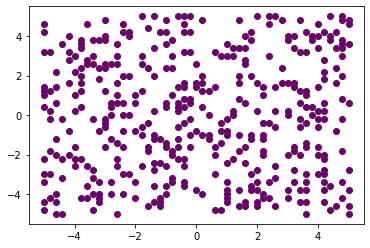

In [4]:
plt.figure()
plt.scatter(X1_train[0:400],X2_train[0:400], color= '#6A006A')
plt.show()

# plot Y(target)

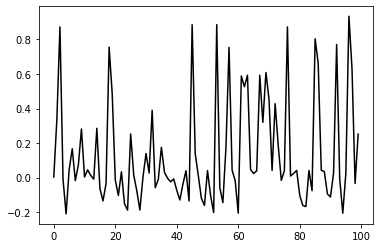

In [5]:
plt.figure()
plt.plot(Y_train[0:100],color= 'black')
plt.show()

# plot X1,X2 and Y Together(3D plot)

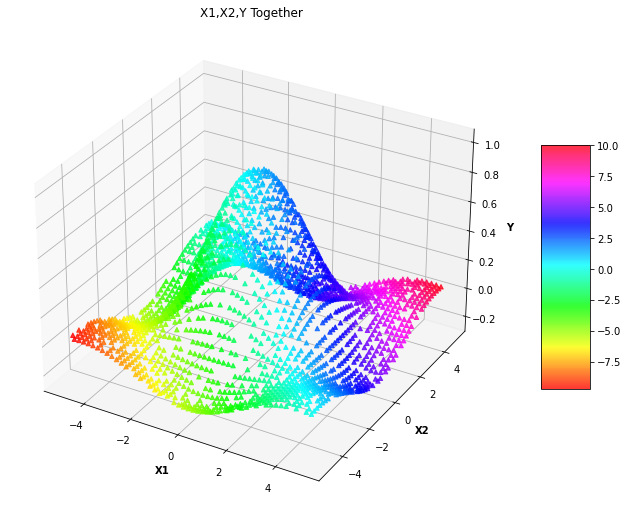

In [6]:
fig = plt.figure(figsize = (16, 9)) 
ax = plt.axes(projection ="3d") 
    
# Add x, y gridlines  
ax.grid(b = True, color ='black',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  

my_cmap = plt.get_cmap('hsv') 
  
# Creating plot 
sctt = ax.scatter3D(X1_train, X2_train, Y_train, 
                    alpha = 0.8, 
                    c = (X1_train + X2_train + Y_train),  
                    cmap = my_cmap,  
                    marker ='^') 
  
plt.title("X1,X2,Y Together") 
ax.set_xlabel('X1', fontweight ='bold')  
ax.set_ylabel('X2', fontweight ='bold')  
ax.set_zlabel('Y', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
  
# show plot 
plt.show() 

In [7]:
class Wangmendel():
    
    def __init__(self,x1_train,x2_train,y_train,x1_test,x2_test,y_test,no_mf):
        self.X1 = x1_train
        self.X2 = x2_train
        self.Y= y_train
        self.X11= x1_test
        self.X22= x2_test
        self.Y22= y_test
        self.number_mf= no_mf
        
    def generate_mf(self):
        self.x_range = np.linspace(min(self.X1),max(self.X1), self.number_mf)
        self.y_range = np.linspace(min(self.Y), max(self.Y), self.number_mf)
        self.X1_mf=[]
        self.X2_mf=[]
        self.Y_mf=[]
        self.center=[]
        for i in range(len(self.x_range) -3):
            self.X1_mf.append(fuzz.trapmf(self.x_range, [self.x_range[i],self.x_range[i+1],self.x_range[i+2],self.x_range[i+3]]))
            self.X2_mf.append(fuzz.trapmf(self.x_range, [self.x_range[i],self.x_range[i+1],self.x_range[i+2],self.x_range[i+3]]))
            self.Y_mf.append(fuzz.trapmf(self.y_range, [self.y_range[i],self.y_range[i+1],self.y_range[i+2],self.y_range[i+3]]))
            self.center.append( (self.y_range[i+1]+self.y_range[i+2])/2)
        # plot X1
        for i in (self.X1_mf):
            plt.plot(self.x_range,i,color='coral')
        plt.xlabel('X1')
        plt.ylabel('membership function u(x1)')
        plt.show()
        # plot X2
        for i in (self.X2_mf):
            plt.plot(self.x_range,i,color='gold')
        plt.xlabel('X2')
        plt.ylabel('membership function u(x2)')
        plt.show()
        # plot Y
        for i in (self.Y_mf):
            plt.plot(self.y_range,i,color='navy')
        plt.xlabel('Y')
        plt.ylabel('membership function u(y)')
        plt.show()

    def generate_rule(self):
        rule_2000 = []
        for i in range(len(self.X1)):
            listX1 , listX2 ,listY = [],[],[]
            for j in range(len(self.X1_mf)):
                listX1.append(fuzz.interp_membership(self.x_range,self.X1_mf[j],self.X1[i]))
                listX2.append(fuzz.interp_membership(self.x_range,self.X2_mf[j],self.X2[i]))
                listY.append(fuzz.interp_membership(self.y_range,self.Y_mf[j],self.Y[i]))

            x1Max , x2max , ymax = np.argmax(listX1) , np.argmax(listX2) , np.argmax(listY)
            degree = listX1[x1Max] * listX2[x2max] * listY[ymax]
            rule_2000.append([x1Max,x2max , ymax , degree])

        print('primitive Rules:')
        print('we have',len(rule_2000),'rules!','\n')
        
       # eliminate duplicates and conflicts here!!!!
        rule_2000.sort(key= lambda rule_2000:rule_2000[0],reverse=True)
        rule_2000.sort(key= lambda rule_2000:rule_2000[1],reverse=True)
        rule_2000.sort(key= lambda rule_2000:rule_2000[2],reverse=True)
        rule_2000.sort(key= lambda rule_2000:rule_2000[3],reverse=True)

        f_rule=[]
        alternative=[]
        alternative.append(rule_2000[0][0:-1]) # -1 for drop degree of rule!
        f_rule.append(rule_2000[0])
        for i in rule_2000[1:]:
            a= i[0]
            b= i[1]
            c= i[2]
            d= i[3]
            if [a,b,c]in alternative:
                continue
            elif [a,b,c]not in alternative:
                alternative.append(i[0:-1])
                f_rule.append(i)


        self.f_rule2=[]
        self.f_rule2.append(f_rule[0])
        alternative2=[]
        alternative2.append(f_rule[0][0:-2])
        for z in f_rule[1:]:
            a= z[0]
            b= z[1]
            c= z[2]
            d= z[3]
            if [a,b] in alternative2:
                continue
            elif [a,b] not in alternative2:
                self.f_rule2.append(z)
                alternative2.append(z[0:-2])
        print('finall rules: ')
        print('we have',len(self.f_rule2),'non conflict and non duplicate rule' )
        K=pd.DataFrame(self.f_rule2)
        print(K)
    
    def train_result(self):
        rule_2 = np.array(self.f_rule2,dtype=int)

        Y_predict = []

        for i in range(len(self.X1)):

            list1 , list2  = [],[]
            for j in range(len(self.X1_mf)):
                list1.append(fuzz.interp_membership(self.x_range,self.X1_mf[j],self.X1[i]))
                list2.append(fuzz.interp_membership(self.x_range,self.X2_mf[j],self.X2[i]))

            sorat,makhraj = 0,0
            for k in range(len(rule_2)):
                sorat += list1[rule_2[k][0]] * list2[rule_2[k][1]] * self.center[rule_2[k][2]]
                makhraj += list1[rule_2[k][0]] * list2[rule_2[k][1]]
            if makhraj==0:
                Y_predict.append(0)
            else: 
                Y_predict.append(sorat/makhraj)
                
        mse_train = sum((self.Y - Y_predict) **2) / (2*len(self.Y))
    
        # draw plot    
        plt.figure()
        plt.plot(range(100),self.Y[0:100],color= 'green')
        plt.plot(range(100) , Y_predict[0:100],color='black')
        plt.show()    
        print('the train error is :',mse_train)
    def test_result(self):
        rule_2 = np.array(self.f_rule2,dtype=int)
        Y_test = []

        listRules = []
        for i in range(len(self.X11)):

            list1 , list2 ,listY = [],[],[]
            for j in range(len(self.X1_mf)):
                list1.append(fuzz.interp_membership(self.x_range,self.X1_mf[j],self.X11[i]))
                list2.append(fuzz.interp_membership(self.x_range,self.X2_mf[j],self.X22[i]))

            sorat,makhraj = 0,0
            for k in range(len(rule_2)):
                sorat += list1[rule_2[k][0]] * list2[rule_2[k][1]] * self.center[rule_2[k][2]]
                makhraj += list1[rule_2[k][0]] * list2[rule_2[k][1]]
            if makhraj==0:
                Y_test.append(0)
            else: 
                Y_test.append(sorat/makhraj)
                
        mse_test = sum((self.Y22 - Y_test) **2) / (2*len(self.Y22))
            
            
        # draw plot    
        plt.figure()
        plt.plot(range(100),self.Y22[0:100],color= 'green')
        plt.plot(range(100) , Y_test[0:100],color='black')
        plt.show() 
        print('the test error is :',mse_test)

# create an object

In [8]:
n_of_mfs= int(input('please enter number of mfs: '))
wang= Wangmendel(X1_train,X2_train,Y_train,X1_test,X2_test,Y_test,n_of_mfs)

please enter number of mfs: 12


# produce mf's

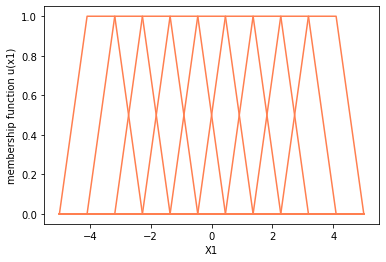

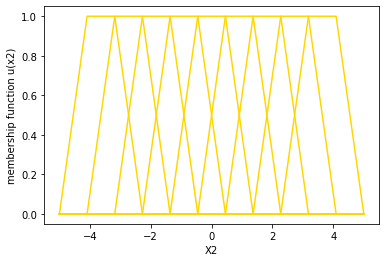

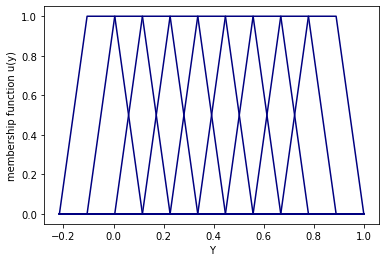

In [9]:
wang.generate_mf()

# produce rules

In [10]:
wang.generate_rule()

primitive Rules:
we have 2000 rules! 

finall rules: 
we have 81 non conflict and non duplicate rule
    0  1  2         3
0   5  5  8  1.000000
1   4  5  8  1.000000
2   3  5  8  1.000000
3   5  4  8  1.000000
4   3  4  8  1.000000
.. .. .. ..       ...
76  4  0  0  1.000000
77  3  0  0  1.000000
78  2  0  0  1.000000
79  1  0  0  1.000000
80  4  4  8  0.474801

[81 rows x 4 columns]


# train part

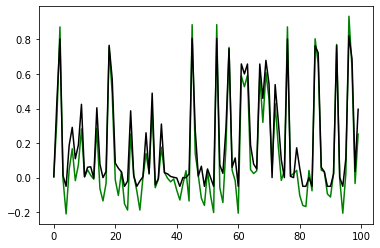

the train error is : 0.005020392720071547


In [11]:
wang.train_result()

# test part

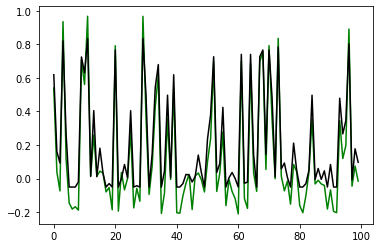

the test error is : 0.004945032100702465


In [12]:
wang.test_result()